In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CSS_PATH = Path("data", "wandb_base_model_sweep.csv")
CSS_2_PATH = Path("data", "wandb_idk.csv")

In [22]:
df = pd.read_csv(CSS_PATH)
# df.head()
print(len(df))
# df = df[["transformer_model", "test_score"]]
# df.loc[df["test_score"] < 0.01]

# extra runs to offset fails
additional_runs = [
    ["upbeat-brook-1027", 123, "roberta-base", 0.5869],
    ["glamorous-water-1026", 123, "roberta-base", 0.5557],
    ["sage-darkness-1025", 123, "distilbert-base-uncased", 0.5913]
]

for run in additional_runs:
    df.loc[len(df)] = run

print(len(df))

45
48


In [24]:
df = df[["transformer_model", "test_score"]]
df = df.loc[df["test_score"] > 0.01]
len(df)

45

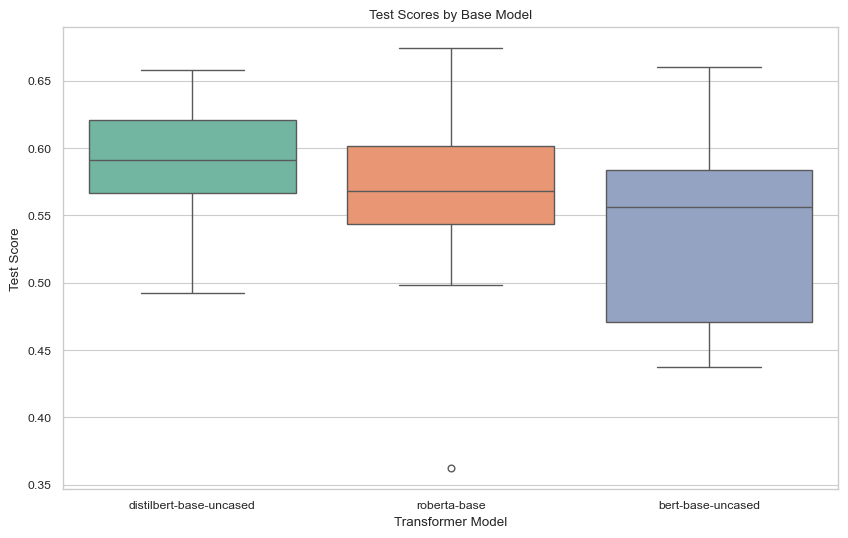

In [26]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='transformer_model', y='test_score', data=df, hue='transformer_model')

plt.title('Test Scores by Base Model')
plt.xlabel('Transformer Model')
plt.ylabel('Test Score')

save_path = Path(os.getcwd(), "output_figs", "base_model_fig.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()